In [1]:
import reference_impl as ref
import utils
import matlab.engine
import dataset

cfg = utils.Config(
    num_rx_antennas=1,
    num_tx_antennas=64,
    num_subcarriers=160,
    train_test_split=0.8,
    data_root="../data/dataset1",
    # duplicate_data=1,
    # data_snr=-1
)

train_set, test_set = dataset.load_data(cfg)
matlab = matlab.engine.start_matlab()
refModel = ref.FullReferenceModel(cfg, matlab)

In [2]:
refModel.fit(train_set)

Reducing offloading overhead...
Training k-means clustering...
Considering bTot: 100
Considering bTot: 200
Considering bTot: 300
Considering bTot: 400
Considering bTot: 500
Considering bTot: 600
Considering bTot: 700
Considering bTot: 800
Considering bTot: 900
Considering bTot: 1000
Considering bTot: 1100
Considering bTot: 1200


  0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
# Downlink
prediction_error, zdl_windows = refModel.process(test_set)

# Uplink
predicted_csis = refModel.decode(prediction_error, zdl_windows)

Assessing performance...
Plotting results...


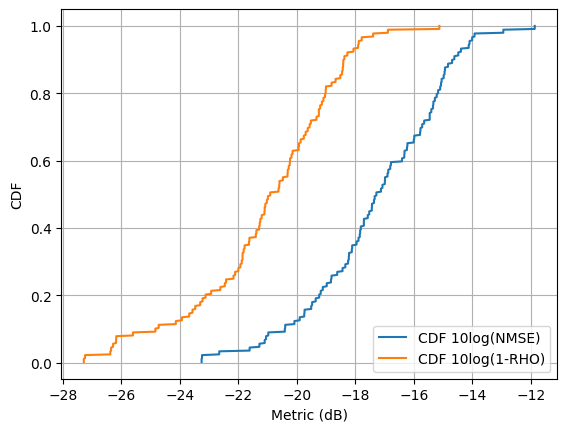

In [4]:
utils.reference_nmse_rho_test(test_set.csi_samples, predicted_csis)